In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
from astropy.io import fits

import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)
from ipywidgets import interactive, widgets
from IPython.display import display, clear_output
from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os
from sun_blinker import SunBlinker
from copy import deepcopy   
from glob import glob


In [2]:
eui_files = sorted(glob("../../src/EUI/HRI/euv174/20221024/solo_L2_eui-hri*.fits"))

In [12]:
eui_template = sunpy.map.Map(eui_files[181]).submap([500,500]*u.pix,top_right=[1500,1500]*u.pix)

In [13]:
eui_map_seq = sunpy.map.Map(eui_files[:10],sequence=True,memmap=True)

In [16]:
eui_map_seq_coalign_shifts = coalignment.calculate_match_template_shift(eui_map_seq,template=eui_template)

In [17]:
eui_map_seq_coalign = coalignment.mapsequence_coalign_by_match_template(eui_map_seq,shift=eui_map_seq_coalign_shifts)

In [18]:
Txshift_hri, Tyshift_hri = 1.67083*u.arcsec,7.60192*u.arcsec
# eui_map_seq_coalign_shift = eui_map_seq_coalign.shift_reference_coord(Txshift_hri,Tyshift_hri)

In [20]:
eis_195_velmap_derot_repro_shifted_hrifov = sunpy.map.Map("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_195_velmap_derot_repro_shifted_hrifov.fits")

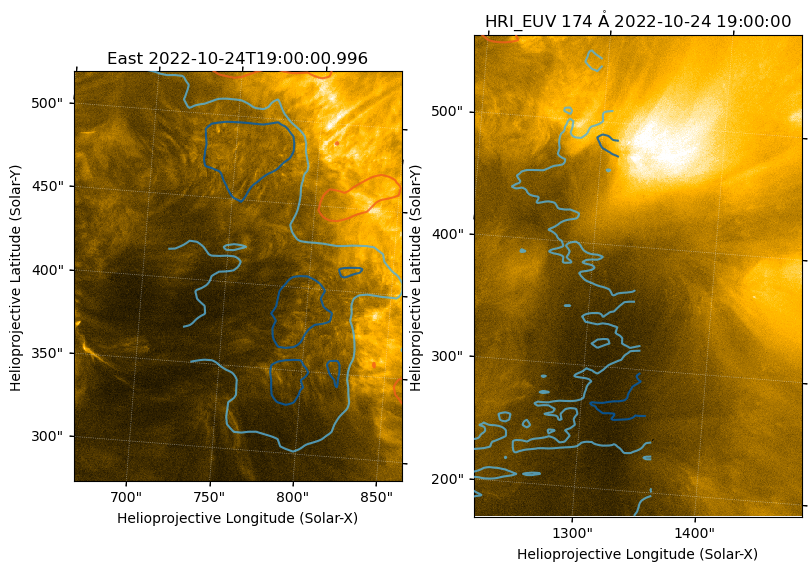

In [24]:
for map in eui_map_seq_coalign[:1]:
    map = map.shift_reference_coord(Txshift_hri,Tyshift_hri)
    eui_map_region_east = map.submap([400,300]*u.pix,top_right=[800,800]*u.pix)
    eui_map_region_west = map.submap([1500,0]*u.pix,top_right=[2048,800]*u.pix)

    fig = plt.figure(figsize=(8,8),constrained_layout=True)
    ax1 = fig.add_subplot(1,2,1,projection=eui_map_region_east)
    ax2 = fig.add_subplot(1,2,2,projection=eui_map_region_west)

    eui_map_region_east.plot(axes=ax1,norm=ImageNormalize(vmin=10,vmax=4000,stretch=AsinhStretch(0.1)))
    eui_map_region_west.plot(axes=ax2,norm=ImageNormalize(vmin=10,vmax=4000,stretch=AsinhStretch(0.1)))

    ax1.set_title(f"East {map.date}")

    for ax_ in (ax1,ax2):
        bounds = ax_.axis()
        eis_195_velmap_derot_repro_shifted_hrifov.draw_contours(levels=[-10,-5,5,10],colors=["#005CAF","#58B2DC","#F05E1C","#E83015"],alpha=0.8,
                                                                axes=ax_)
        ax_.axis(bounds)
    # fig.clf()
    # plt.colorbar(ax1.images[0],ax=ax1)

In [7]:
eui_map_region_east = eui_map_seq_coalign.submap([400,300]*u.pix,top_right=[800,800]*u.pix)
eui_map_region_west = eui_map_seq_coalign.submap([1500,0]*u.pix,top_right=[2048,800]*u.pix)
                                                 

AttributeError: 'MapSequence' object has no attribute 'submap'